In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

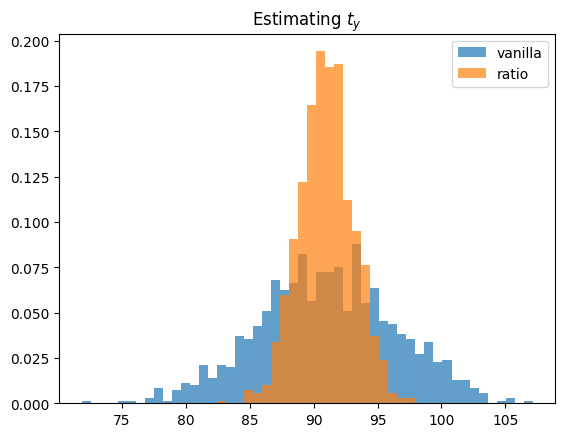

In [113]:
def make_dataset(n, B, e, rng):
    pop = np.zeros((n, 2))
    pop[:,0] = np.random.uniform(size=n) + 1
    pop[:,1] = B*pop[:,0] + e*rng.normal(0, e, size=n)
    return pop

N = 100
n = 10
B = 0.6
e = 0.3
rng = np.random.default_rng(42)
pop = make_dataset(N, B, e, rng)
Xt = pop[:,0].sum()
n_iter = 1000
vanilla = np.zeros(n_iter)
ratio = np.zeros(n_iter)
bhat = np.zeros(n_iter)
for i in range(n_iter):
    sample = rng.choice(pop, axis=0, size=n, replace=False)
    xbar, ybar = sample.mean(axis=0)
    bhat[i] = ybar/xbar
    vanilla[i] = ybar*N
    ratio[i] = ybar/xbar*Xt


_, bins, __ = plt.hist(vanilla, bins=50, alpha=0.7, density=True, label="vanilla")
plt.hist(ratio, bins=bins, alpha=0.7, density=True, label="ratio");
plt.legend()
plt.title("Estimating $t_y$");

151.7652036536349 152.2390814108167
74.72794483891441 143.63072457661798


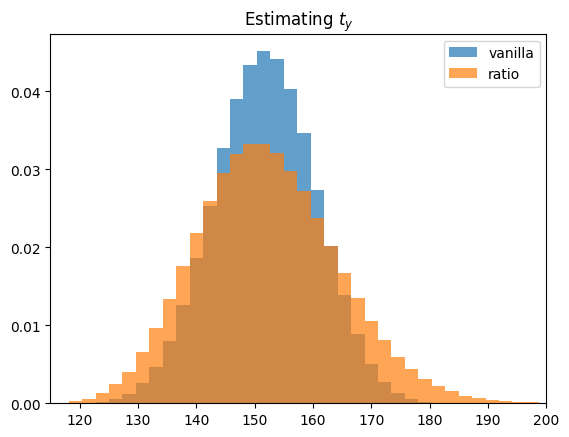

In [173]:
N = 100
n = 10
rng = np.random.default_rng(42)
pop = rng.uniform(size=(N, 2)) + 1
Xt = pop[:,0].sum()

n_iter = 1000000
vanilla = np.zeros(n_iter)
ratio = np.zeros(n_iter)
for i in range(n_iter):
    sample = rng.choice(pop, axis=0, size=n, replace=False)
    xbar, ybar = sample.mean(axis=0)
    vanilla[i] = ybar*N
    ratio[i] = ybar/xbar*Xt


xmin = min(ratio.min(), vanilla.min())
xmax = max(ratio.max(), vanilla.max())
bins = np.linspace(xmin, xmax, 50)
plt.hist(vanilla, bins=bins, alpha=0.7, density=True, label="vanilla");
plt.hist(ratio, bins=bins, alpha=0.7, density=True, label="ratio")
plt.legend()
plt.title("Estimating $t_y$")
plt.xlim(115, 200)
print(vanilla.mean(), ratio.mean())
print(vanilla.var(), ratio.var())

In [170]:
V = []
R = []
n_iters = [2**k for k in range(5, 22)]
for n_iter in n_iters:
    vanilla = np.zeros(n_iter)
    ratio = np.zeros(n_iter)
    for i in range(n_iter):
        sample = rng.choice(pop, axis=0, size=n, replace=False)
        xbar, ybar = sample.mean(axis=0)
        vanilla[i] = ybar*N
        ratio[i] = ybar/xbar*Xt
    v = vanilla.mean()
    r = ratio.mean()
    V.append(vanilla.mean())
    R.append(ratio.mean())
    print(f"n_iter = {n_iter}, v = {v:.4f}, r = {r:4f}")




n_iter = 32, v = 148.7502, r = 150.072121
n_iter = 64, v = 153.6718, r = 153.461779
n_iter = 128, v = 151.9685, r = 152.808476
n_iter = 256, v = 150.9822, r = 151.046655
n_iter = 512, v = 151.5811, r = 151.871641
n_iter = 1024, v = 151.8339, r = 152.153760
n_iter = 2048, v = 151.8606, r = 152.465254
n_iter = 4096, v = 151.9567, r = 152.725157
n_iter = 8192, v = 151.9551, r = 152.515967
n_iter = 16384, v = 151.6714, r = 152.067733
n_iter = 32768, v = 151.7502, r = 152.173450
n_iter = 65536, v = 151.8237, r = 152.273144
n_iter = 131072, v = 151.7889, r = 152.294423
n_iter = 262144, v = 151.7506, r = 152.224120
n_iter = 524288, v = 151.7640, r = 152.242562
n_iter = 1048576, v = 151.7560, r = 152.207167
n_iter = 2097152, v = 151.7695, r = 152.239157


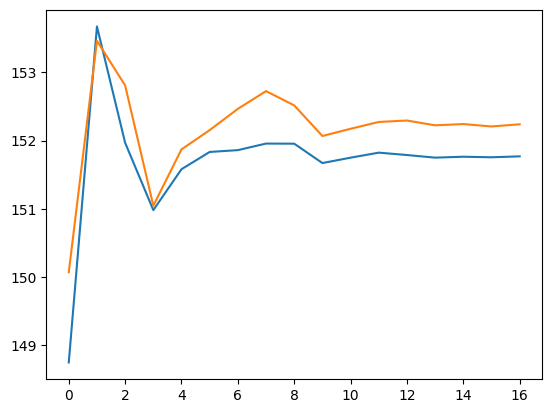

In [171]:
plt.plot(V)
plt.plot(R)

In [180]:
def subsets(k, n):
    """Generate subsets of size k from {0, 1, ..., n - 1}."""
    if type(k) != int or type(n) != int:
        raise ValueError("k and n must be integers.")
    if k < 0 or n < 0:
        raise ValueError("k and n must be nonnegative.")
    if k > n:
        raise ValueError("k cannot be larger than n.")
    if k == 0:
        return [[]]
    elif k == n:
        return [list(range(n))]
    else: # k < n
        return subsets(k, n - 1) + [[*s, n - 1] for s in subsets(k - 1, n - 1)]
I = subsets(4, 8)
len(I)

70

In [232]:
N = 7
rng = np.random.default_rng(42)
x = np.array([1,  2, 3,  4, 5, 6,  7])
y = np.array([-1, -1, 1, -1, 1, 1, -1])
xt = x.sum()
I = subsets(2, 7)
vanilla = np.zeros(len(I))
ratio = np.zeros(len(I))
R = np.zeros(len(I))
for j, i in enumerate(I):
    xbar = x[i].mean()
    ybar = y[i].mean()
    vanilla[j] = ybar*N
    ratio[j] = ybar/xbar*xt
    R[j] = ybar/xbar


In [233]:
vanilla.mean(), vanilla.var()

(-1.0, 20.0)

In [234]:
y.mean()/x.mean()

-0.03571428571428571

In [235]:
R.mean()

-0.06666666666666668

In [238]:
N = 8
k = 4
rng = np.random.default_rng(42)
x = np.array([0, 1,  2, 3,  4, 5, 6,  7])
y = np.array([-1, -1, -1, 1, -1, 1, 1, -1])
xt = x.sum()
I = subsets(k, N)
vanilla = np.zeros(len(I))
ratio = np.zeros(len(I))
R = np.zeros(len(I))
for j, i in enumerate(I):
    xbar = x[i].mean()
    ybar = y[i].mean()
    vanilla[j] = ybar*N
    ratio[j] = ybar/xbar*xt
    R[j] = ybar/xbar


In [243]:
y.mean()/x.mean(), R.mean()

(-0.07142857142857142, -0.08916786466764352)

In [241]:
vanilla.mean(), vanilla.var()

(-2.0, 8.571428571428571)

In [242]:
ratio.mean(), ratio.var()

(-2.496700210694019, 13.281943394705536)

(array([ 1.,  0.,  1.,  3.,  5., 11., 14.,  0., 30.,  5.]),
 array([-0.57142857, -0.5       , -0.42857143, -0.35714286, -0.28571429,
        -0.21428571, -0.14285714, -0.07142857,  0.        ,  0.07142857,
         0.14285714]),
 <BarContainer object of 10 artists>)

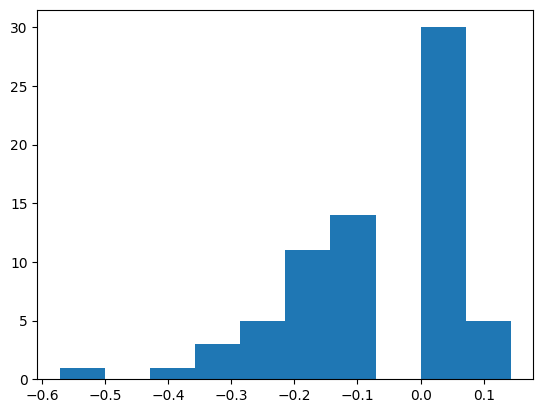

## Ratio Estimation

Let $(x_0,y_0),\ldots,(x_{N-1},y_{N-1})$ be paired values over
$$
U = \{0,1,\ldots,N-1\}.
$$

For a sample $I\subset U$, we consider the ratio
$$
B_I = \frac{\bar{y}_I}{\bar{x}_I} = \frac{\displaystyle\sum_{i\in I}y_i}{\displaystyle\sum_{i\in I}x_i}.
$$

It is natural to use sample ratios $B_I$, to estimate the population ratio $r_U$.

The estimators $B_I$ are *biased*:
$$
\mathbb{E}[\hat{B}] \neq B.
$$


In [253]:
def subsets(k, n):
    """Generate subsets of size k from {0, 1, ..., n - 1}."""
    if type(k) != int or type(n) != int:
        raise ValueError("k and n must be integers.")
    if k < 0 or n < 0:
        raise ValueError("k and n must be nonnegative.")
    if k > n:
        raise ValueError("k cannot be larger than n.")
    if k == 0:
        return [[]]
    elif k == n:
        return [list(range(n))]
    else: # k < n
        return subsets(k, n - 1) + [[*s, n - 1] for s in subsets(k - 1, n - 1)]

rng = np.random.default_rng(42)
x = np.array([0, 1,  2, 3,  4, 5, 6,  7])
y = np.array([1, 1, 1, -1, 1, -1, -1, 1])
Is = subsets(k, N)
Bhats = [y[I].mean()/x[I].mean() for I in Is]
print(f"B = {y.mean()/x.mean():.4f}")
print(f"The mean of the sampling distribution of Bhat is {np.mean(Bhats):.4f}.")

B = 0.0714
The mean of the sampling distribution of Bhat is 0.0892.


In [249]:
np.mean(rs)

-0.08916786466764352

In [261]:
x = np.array([1, 0, 8, 2, 76, 60, 25, 2, 1, 31])
y = np.array([0, 0, 1, 2, 10, 15, 3, 2, 1, 27])
df = pd.DataFrame({"x": x, "y": y})
df

,x,y
0,1,0
1,0,0
2,8,1
3,2,2
4,76,10
5,60,15
6,25,3
7,2,2
8,1,1
9,31,27


In [262]:
df.agg(["sum", "mean", "std"])

,x,y
sum,206.000000,61.000000
mean,20.600000,6.100000
std,27.472006,8.824839


$$
\begin{aligned}
\widehat{\mathbb{V}}(\widehat{B}) &= 
\left(1 - \frac nN\right)\frac1{n\bar{x}_U^2}
\frac{\displaystyle\sum_{i\in I}(y_i - \widehat{B}x_i)^2}{n-1}\\
\widehat{\operatorname{SE}}(\widehat{B})&= 
\sqrt{\widehat{\mathbb{V}}(\widehat{B})}
\end{aligned}
$$

If $n\ll N$, then
$$
1-\frac nN\approx 1
$$
and
$$
\widehat{\mathbb{V}}(\widehat{B}) \approx 
\frac1{n\bar{x}_U^2}
\frac{\displaystyle\sum_{i\in I}(y_i - \widehat{B}x_i)^2}{n-1}
$$

In [269]:
Bhat = y.sum()/x.sum()
v = np.sqrt(np.sum((y - Bhat*x)**2)/((n-1)*n*x.mean()**2))

0.11526218633226289

In [273]:
pop = pd.read_csv("data/agpop.csv", usecols=["acres92", "region"])
sample = pd.read_csv("data/agsrs.csv", usecols=["acres92", "region"])

Suppose
$$
U = \bigsqcup_{d<D} U_d.
$$
Let $N_d$ be the size of $U_d$.

Let $I_0$ be a sample drawn from $U_0$ of size $n_0$.

A natural estimator of
$$
\bar{y}_{U_0}=
\frac{\displaystyle\sum_{i\in U_0}y_i}{N_d}
$$
is
$$
\bar{y}_{I_0}=
\frac{\displaystyle\sum_{i\in I_0}y_i}{n_d}
$$

The estimator $\hat{y}_{I_0}$ is secretly a ratio estimator!

Define
$$
x_i = \begin{cases}
1&\text{if $i\in U_d$},\\
0&\text{otherwise}
\end{cases},\qquad\text{and}\qquad
u_i = \begin{cases}
y_i&\text{if $i\in U_d$},\\
0&\text{otherwise.}
\end{cases}
$$

Then
$$
\widehat{B} =\frac{\bar{u}_{I_0}}{\bar{x}_{I_0}} = \bar{y}_{I_0}
$$
is a ratio estimator of
$$
\bar{y}_{U_0} = \frac{\bar{u}_{U_0}}{\bar{x}_{U_0}} = B.
$$

Notice that
$$
\bar{x}_{U_0} = \frac{N_0}{N}
$$
and that
$$
\begin{aligned}
\sum_{i\in I}(y_i - \widehat{B}x_i)^2
&= \sum_{i\in I_0}(y_i - \bar{y}_{I_0})^2\\
&= (n_d-1)s_0^2
\end{aligned}
$$

\begin{aligned}
\widehat{\mathbb{V}}(\widehat{B}) &= 
\left(1 - \frac nN\right)\frac1{n\bar{x}_U^2}
\frac{\displaystyle\sum_{i\in I}(y_i - \widehat{B}x_i)^2}{n-1}\\
&= \left(1 - \frac nN\right)\frac1{n}\left(\frac{N}{N_0}\right)^2
\frac{(n_0-1)s_0^2}{n-1}\\
&\approx \left(1 - \frac nN\right)\frac1{n}\left(\frac{n}{n_0}\right)^2
\frac{n_0s_0^2}{n}
s_0^2\\
&= \left(1 - \frac nN\right)\frac{s_0^2}{n}
\end{aligned}
$$

### Example

The Academic Performance Index (API) is computed for all California schools based on standardised testing of students. The data sets contain information for all schools with at least 100 students and for various probability samples of the data.

*Investigate ratio estimators of the variable `api00` (API score in year 1999) using `api99` (API score in 1999) as an auxilliary variable.*

In [276]:
apipop = pd.read_csv("data/apipop.csv")
apipop

,cds,stype,name,sname,snum,dname,dnum,cname,cnum,flag,...,not.hsg,hsg,some.col,col.grad,grad.sch,avg.ed,full,emer,enroll,api.stu
0,1611190130229,H,Alameda High,Alameda High,1,Alameda City Unified,6,Alameda,1,NaN,...,6,16,22,38,18,3.45,85.0,16.0,1278.0,1090
1,1611190132878,H,Encinal High,Encinal High,2,Alameda City Unified,6,Alameda,1,NaN,...,11,20,29,31,9,3.06,90.0,10.0,1113.0,840
2,1611196000004,M,Chipman Middle,Chipman Middle,3,Alameda City Unified,6,Alameda,1,NaN,...,11,31,30,20,8,2.82,80.0,12.0,546.0,472
3,1611196090005,E,Lum (Donald D.),Lum (Donald D.) Elementary,4,Alameda City Unified,6,Alameda,1,NaN,...,3,22,29,31,15,3.32,96.0,4.0,330.0,272
4,1611196090013,E,Edison Elementa,Edison Elementary,5,Alameda City Unified,6,Alameda,1,NaN,...,3,9,29,26,33,3.76,95.0,5.0,233.0,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,58727366056782,E,Yuba Feather El,Yuba Feather Elementary,6190,Marysville Joint Unified,427,Yuba,57,NaN,...,8,40,36,10,6,2.66,90.0,10.0,132.0,115
6190,58727366056790,M,Yuba Gardens In,Yuba Gardens Intermediate,6191,Marysville Joint Unified,427,Yuba,57,NaN,...,27,28,29,15,1,2.36,87.0,7.0,606.0,391
6191,58727516056816,M,Bear River Elem,Bear River Elementary,6192,Wheatland Elementary,808,Yuba,57,NaN,...,1,36,2,48,13,3.37,100.0,0.0,602.0,406
6192,58727516056824,E,Far West Elemen,Far West Elementary,6193,Wheatland Elementary,808,Yuba,57,NaN,...,16,25,46,12,0,2.55,100.0,0.0,360.0,247


In [281]:
y = apipop.api00
x = apipop.api00

assert (not y.isna().any()) and (not x.isna().any())

In [286]:
apipop.groupby("stype").sample(67)

,cds,stype,name,sname,snum,dname,dnum,cname,cnum,flag,...,not.hsg,hsg,some.col,col.grad,grad.sch,avg.ed,full,emer,enroll,api.stu
4301,37680236037931,E,Rice (Lilian J.,Rice (Lilian J.) Elementary,4302,Chula Vista Elementary,135,San Diego,36,NaN,...,22,44,33,0,0,2.11,100.0,0.0,500.0,431
3844,34674476034748,E,Mitchell (Billy,Mitchell (Billy) Elementary,3845,San Juan Unified,636,Sacramento,33,NaN,...,11,24,33,22,11,2.98,80.0,15.0,300.0,214
1316,19645016013171,E,Durfee Elementa,Durfee Elementary,1317,El Monte City Elementary,203,Los Angeles,18,NaN,...,34,27,27,9,3,2.20,82.0,21.0,665.0,529
5374,43696666048714,E,Terrell Element,Terrell Elementary,5375,San Jose Unified,635,Santa Clara,42,NaN,...,19,22,21,31,7,2.85,86.0,0.0,418.0,366
3093,30666476030027,E,Glenknoll Drive,Glenknoll Drive Elementary,3094,Placentia-Yorba Linda,556,Orange,29,NaN,...,0,0,0,0,0,NaN,100.0,0.0,516.0,450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4975,41689166043756,M,Pollicita (Thom,Pollicita (Thomas R.) Middle,4976,Jefferson Elementary,322,San Mateo,40,NaN,...,14,29,26,28,3,2.77,95.0,0.0,548.0,485
4257,37679676037535,M,Mac Queen (Joan,Mac Queen (Joan) Middle,4258,Alpine Union Elementary,12,San Diego,36,NaN,...,4,18,39,26,13,3.25,100.0,6.0,763.0,682
4019,36677106106504,M,Southridge Midd,Southridge Middle,4020,Fontana Unified,238,San Bernardino,35,NaN,...,17,21,33,23,6,2.81,77.0,18.0,1160.0,1030
3956,36676786105712,M,Townsend (Rober,Townsend (Robert O.) Jr. High,3957,Chino Valley Unified,131,San Bernardino,35,NaN,...,13,13,29,33,12,3.18,93.0,12.0,1022.0,933


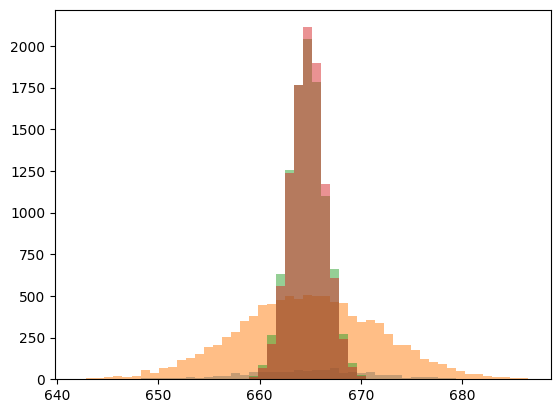

In [313]:
rng = np.random.default_rng(42)
xbar = apipop.api99.mean()
n_iter = 10000
Bhat = np.zeros(n_iter)
srs = np.zeros(n_iter)
strat = np.zeros(n_iter)
srsratio = np.zeros(n_iter)
stratratio = np.zeros(n_iter)
for i in range(n_iter):
    sample = apipop.sample(frac=0.05, random_state=rng)
    y = sample.api00
    x = sample.api99
    srs[i] = y.mean()
    srsratio[i] = y.mean()/x.mean()*xbar

    sample = apipop.groupby("stype").sample(frac=0.05, random_state=rng)
    y = sample.api00
    x = sample.api99
    strat[i] = y.mean()
    stratratio[i] = y.mean()/x.mean()*xbar

_, bins, __ = plt.hist(vanilla, bins=50, alpha=0.5)
plt.hist(strat, bins=bins, alpha=0.5);
plt.hist(srsratio, bins=bins, alpha=0.5);
plt.hist(stratratio, bins=bins, alpha=0.5);

In [312]:
print(srs.mean(), srs.std())
print(strat.mean(), strat.std())
print(srsratio.mean(), srsratio.std())
print(stratratio.mean(), stratratio.std())

664.4560838709677 7.0684618830648915
664.7245677419356 6.9919940352082035
664.7297932510672 1.7978171171816686
664.7254062584622 1.6780883985240527


In [343]:
apipop = pd.read_csv("apipop.csv")
N = len(apipop)
xU = apipop.api99

apistrat = pd.read_csv("apistrat.csv")
n = len(apistrat)
y = apistrat.api00
x = apistrat.api99
Bhat = y.mean()/x.mean()
se2 = np.sum((y - Bhat*x)**2) / (n - 1)

v = (1-n/N) * se2/n
np.sqrt(v)

2.0828669224969865

In [348]:
y.mean()/x.mean()*xU.mean()

660.2255540379205

In [345]:
Bhat*x

0      852.560509
1      497.326964
2      568.373673
3      477.475677
4      688.526195
          ...    
195    442.997127
196    647.778818
197    623.748314
198    522.402273
199    636.285968
Name: api99, Length: 200, dtype: float64